In [1]:
#### Get Cities

In [7]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import api and url
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [11]:
#### Get the City Weather Data

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | cawayan
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | camocim
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | vanimo
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | jaguaribe
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | narok
Processing Re

Processing Record 35 of Set 4 | rosarito
Processing Record 36 of Set 4 | klaksvik
Processing Record 37 of Set 4 | hamilton
Processing Record 38 of Set 4 | knysna
Processing Record 39 of Set 4 | lolua
City not found. Skipping...
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | boende
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | kamaishi
Processing Record 44 of Set 4 | lufilufi
Processing Record 45 of Set 4 | macamic
Processing Record 46 of Set 4 | sol-iletsk
Processing Record 47 of Set 4 | severnoye
Processing Record 48 of Set 4 | apsheronsk
Processing Record 49 of Set 4 | brunico
Processing Record 50 of Set 4 | carazinho
Processing Record 1 of Set 5 | kuito
Processing Record 2 of Set 5 | saskylakh
Processing Record 3 of Set 5 | kupang
Processing Record 4 of Set 5 | igrim
Processing Record 5 of Set 5 | villarrubia de los ojos
Processing Record 6 of Set 5 | natitingou
Processing Record 7 of Set 5 | kozhva
Processing Record 8 of Set 5 | le

Processing Record 18 of Set 8 | lewistown
Processing Record 19 of Set 8 | lesnoy
Processing Record 20 of Set 8 | asosa
Processing Record 21 of Set 8 | mushie
Processing Record 22 of Set 8 | mocuba
Processing Record 23 of Set 8 | luderitz
Processing Record 24 of Set 8 | kahului
Processing Record 25 of Set 8 | roswell
Processing Record 26 of Set 8 | grindavik
Processing Record 27 of Set 8 | avera
Processing Record 28 of Set 8 | haines junction
Processing Record 29 of Set 8 | tessaoua
Processing Record 30 of Set 8 | batagay
Processing Record 31 of Set 8 | ningan
City not found. Skipping...
Processing Record 32 of Set 8 | porangatu
Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | san patricio
Processing Record 35 of Set 8 | santa cruz de tenerife
Processing Record 36 of Set 8 | corn island
Processing Record 37 of Set 8 | cogoleto
Processing Record 38 of Set 8 | nicoya
Processing Record 39 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set

Processing Record 5 of Set 12 | kurtamysh
Processing Record 6 of Set 12 | castro verde
Processing Record 7 of Set 12 | beloha
Processing Record 8 of Set 12 | shirakawa
Processing Record 9 of Set 12 | machakos
Processing Record 10 of Set 12 | griffith
Processing Record 11 of Set 12 | labutta
City not found. Skipping...
Processing Record 12 of Set 12 | garut
Processing Record 13 of Set 12 | invermere
Processing Record 14 of Set 12 | esqueda
Processing Record 15 of Set 12 | north platte
Processing Record 16 of Set 12 | silver city
Processing Record 17 of Set 12 | udachnyy
Processing Record 18 of Set 12 | meulaboh
Processing Record 19 of Set 12 | san andres
Processing Record 20 of Set 12 | kabanjahe
Processing Record 21 of Set 12 | najran
Processing Record 22 of Set 12 | tra vinh
Processing Record 23 of Set 12 | vao
Processing Record 24 of Set 12 | mayo
Processing Record 25 of Set 12 | matola
Processing Record 26 of Set 12 | khagrachari
City not found. Skipping...
Processing Record 27 of S

In [13]:
len(city_data)

554

In [14]:
#### DataFrame of City Weather Data

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,53.46,75,100,6.91,AU,2022-03-31 19:47:34
1,Cawayan,9.9718,122.6249,79.72,81,61,6.69,PH,2022-03-31 20:00:30
2,Thompson,55.7435,-97.8558,41.16,33,75,8.05,CA,2022-03-31 19:50:35
3,Camocim,-2.9022,-40.8411,76.60,87,100,8.14,BR,2022-03-31 20:00:31
4,Norman Wells,65.2820,-126.8329,-9.02,84,100,14.20,CA,2022-03-31 20:00:31
5,Port Alfred,-33.5906,26.8910,64.18,92,100,1.01,ZA,2022-03-31 20:00:32
6,Vanimo,-2.6741,141.3028,77.32,88,91,8.99,PG,2022-03-31 20:00:32
7,Rikitea,-23.1203,-134.9692,78.04,66,75,15.03,PF,2022-03-31 20:00:32
8,Georgetown,5.4112,100.3354,78.73,93,20,3.44,MY,2022-03-31 19:48:53
9,Mataura,-46.1927,168.8643,44.33,85,100,2.26,NZ,2022-03-31 20:00:33


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-03-31 19:47:34,-42.8794,147.3294,53.46,75,100,6.91
1,Cawayan,PH,2022-03-31 20:00:30,9.9718,122.6249,79.72,81,61,6.69
2,Thompson,CA,2022-03-31 19:50:35,55.7435,-97.8558,41.16,33,75,8.05
3,Camocim,BR,2022-03-31 20:00:31,-2.9022,-40.8411,76.60,87,100,8.14
4,Norman Wells,CA,2022-03-31 20:00:31,65.2820,-126.8329,-9.02,84,100,14.20
5,Port Alfred,ZA,2022-03-31 20:00:32,-33.5906,26.8910,64.18,92,100,1.01
6,Vanimo,PG,2022-03-31 20:00:32,-2.6741,141.3028,77.32,88,91,8.99
7,Rikitea,PF,2022-03-31 20:00:32,-23.1203,-134.9692,78.04,66,75,15.03
8,Georgetown,MY,2022-03-31 19:48:53,5.4112,100.3354,78.73,93,20,3.44
9,Mataura,NZ,2022-03-31 20:00:33,-46.1927,168.8643,44.33,85,100,2.26


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
#Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1648925766.39453

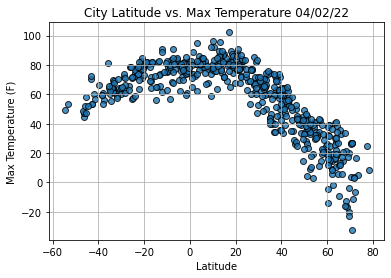

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

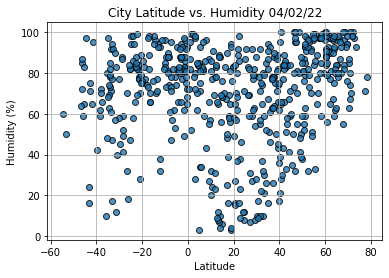

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

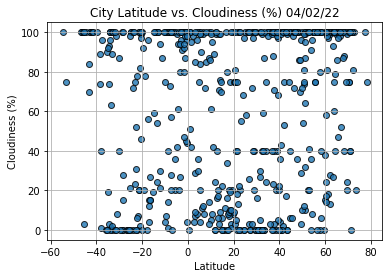

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

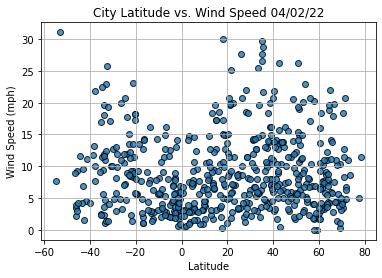

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2022-03-31 20:00:34
Lat                       71.2906
Lng                     -156.7887
Max Temp                   -11.18
Humidity                       70
Cloudiness                      0
Wind Speed                  20.71
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
549    False
550     True
551    False
552    False
553     True
Name: Lat, Length: 554, dtype: bool

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

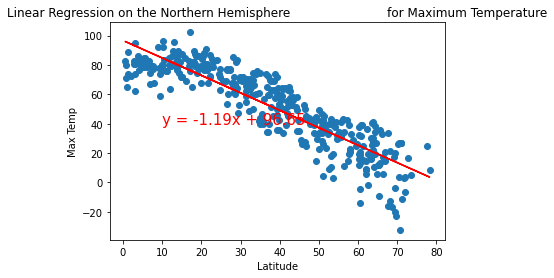

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

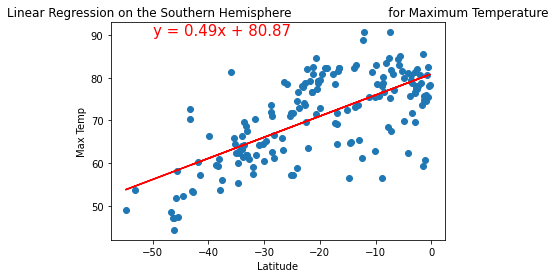

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

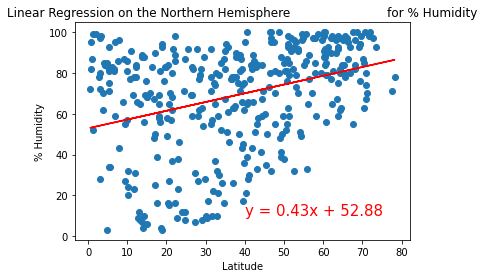

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

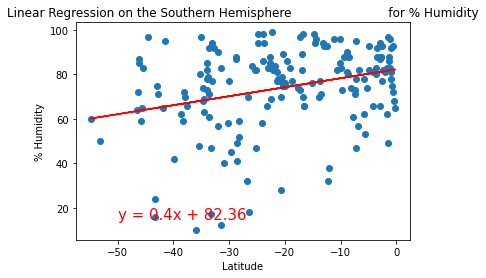

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

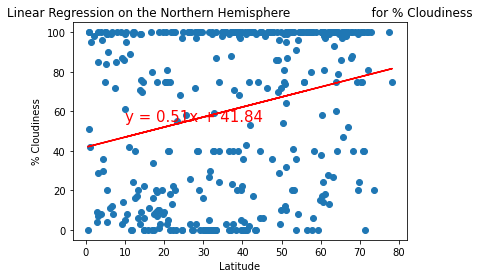

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

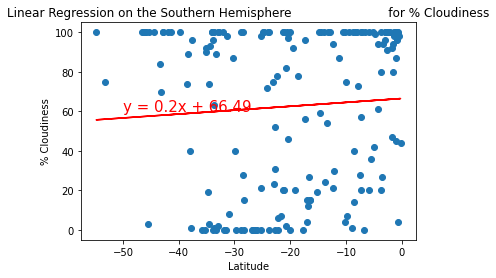

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

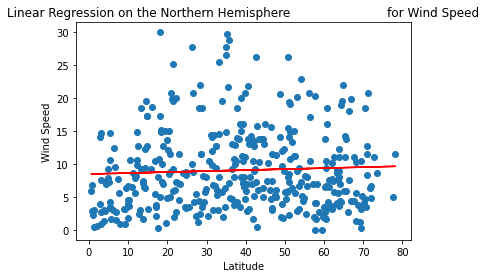

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

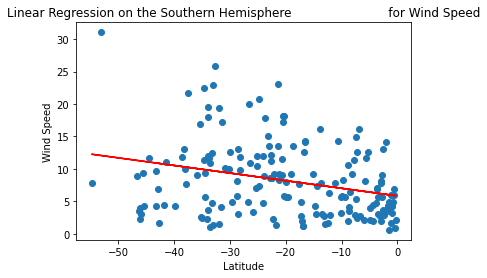

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))